In [ ]:
#Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Regression.csv')
df.head()

,Length,Weight,Cost (Target)
0,10,15,45
1,11,6,37
2,12,14,48
3,7,9,33
4,9,14,38


In [ ]:
df.shape

(15, 3)

In [ ]:
df.columns

Index(['Length', 'Weight', 'Cost (Target)'], dtype='object')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, accuracy_score

In [ ]:
feature_cols = ["Length","Weight"]
target=["Cost (Target)"]
X=df[feature_cols]
y=target

In [ ]:
#Generate dataset
np.random.seed(42)
X=np.sort(5*np.random.rand(80,1),axis=0)
y=np.sin(X).ravel() + np.random.normal(0,0.1,X.shape[0])

In [ ]:
#Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Train kNN Regression Algorithm
k=3
knn=KNeighborsRegressor(n_neighbors=k,weights="uniform")
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
#Predict
y_pred = knn.predict(X_test_scaled)

In [ ]:
#Evaluate
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.008014943576430528
Mean Absolute Error: 0.07549274644632774
R-squared: 0.9824889815003544


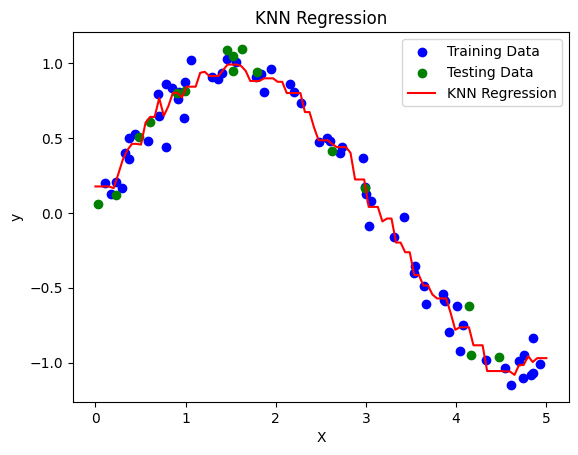

In [ ]:
# Plot Results
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.scatter(X_test, y_test, color='green', label="Testing Data")
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_plot = knn.predict(scaler.transform(X_plot))
plt.plot(X_plot, y_plot, color='red', label="KNN Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.title("KNN Regression")
plt.legend()
plt.show()